In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('LunarLander-v2')
#env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


In [3]:
from perdqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)

# watch an untrained agent
state,info = env.reset()
for j in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, truncated,info = env.step(action)
    if done:
        break 
        
env.close()

Episode 100	Average Score: -163.74
Episode 200	Average Score: -113.47
Episode 300	Average Score: -43.043
Episode 400	Average Score: 4.5700
Episode 500	Average Score: 60.36
Episode 600	Average Score: 134.71
Episode 694	Average Score: 202.10
Environment solved in 594 episodes!	Average Score: 202.10


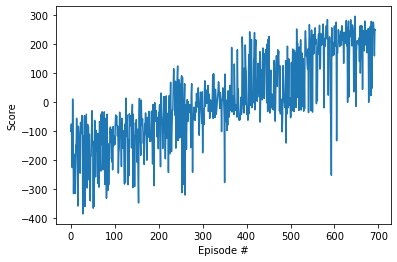

In [4]:
from collections import namedtuple
Experience = namedtuple('Experience', ['state', 'action', 'reward', 'next_state', 'done'])
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state,info = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, truncated,info = env.step(action)
            agent.one_step(state, action, reward, next_state, done)
            #agent.memory.push(Experience(state, action, reward, next_state, done))
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [19]:
torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

TypeError: save() got an unexpected keyword argument 'encoding'

In [18]:
agent.qnetwork_local.load_state_dict(torch.load("checkpoint.pth"))

for i in range(3):
    state,info = env.reset()
    for j in range(200):
        action = agent.act(state)
        env.render()
        state, reward, done, truncated,info = env.step(action)
        if done:
            break 
            
env.close()